# ADVANCE VISUALIZATION
# Menengah-1

- WORD CLOUD - WAFFLE CHART
- LIB : seaborn

In [24]:
import pandas as pd
import numpy as np
from PIL import Image

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # <== for waffles chart

mpl.style.use('ggplot') # optional: for ggplot-like style

In [25]:
pd_canada = pd.read_excel('Data/Canada.xlsx',
                         sheet_name='Canada by Citizenship',
                         skiprows=(20),
                         skipfooter=2)

In [26]:
pd_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [27]:
#bersihkan dataset
pd_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
pd_canada.rename(columns={'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace=True)
pd_canada.columns = list(map(str, pd_canada)) #kolom nama menjadi string
pd_canada.set_index('Country', inplace=True) #kolom country menjadi index
pd_canada['Total'] = pd_canada.sum(axis=1) #add kolom Total

years = list(map(str,range(1980,2014)))


## Waffle Chart

#Case-1 Denmark Norwegia Swedia

In [28]:
DNS = pd_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

In [29]:
DNS.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [30]:
#proporsi value tiap kategori terhadap totalnya
total_values = sum(DNS['Total'])

KeyError: 'Total'

# WORD CLOUD

In [32]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

##  Case-2 : negara mana yang sering pindah ke Canada

In [35]:
Total_immigrant = pd_canada['Total'].sum()

In [36]:
Total_immigrant

6409153

In [59]:
Max_word = 100000
word_string = ''
for country in pd_canada.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(pd_canada.loc[country, 'Total'] / float(Total_immigrant)*Max_word)
        word_string = word_string + ((country + ' ') * repeat_num_times)

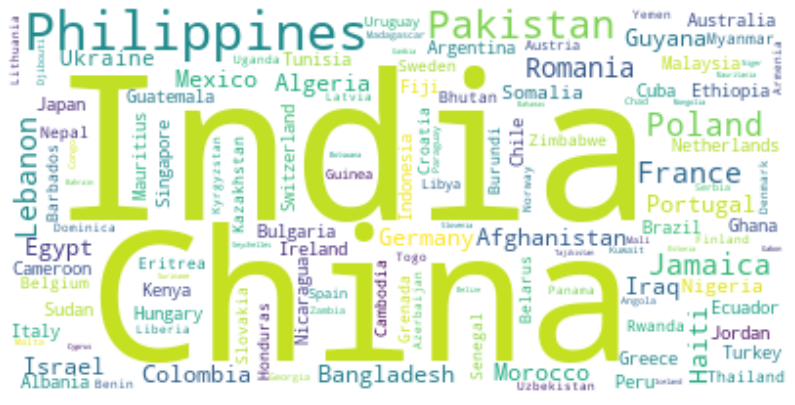

In [60]:
WC_Canada = WordCloud(background_color = 'White', collocations=False).generate(word_string)

fig = plt.figure()
fig.set_figheight(28)
fig.set_figwidth(14)

plt.imshow(WC_Canada, interpolation = 'bilinear')
plt.axis('off')
plt.show();

In [61]:
Alice_Novel = open('Data/Alice_Novel.txt', 'r').read()

In [62]:
print(len(Alice_Novel))

145191


In [84]:
stopwords.add('Said')
Alice_WC = WordCloud(background_color='yellow',
                    max_words=12500, 
                     stopwords=STOPWORDS)

Alice_WC.generate(Alice_Novel)

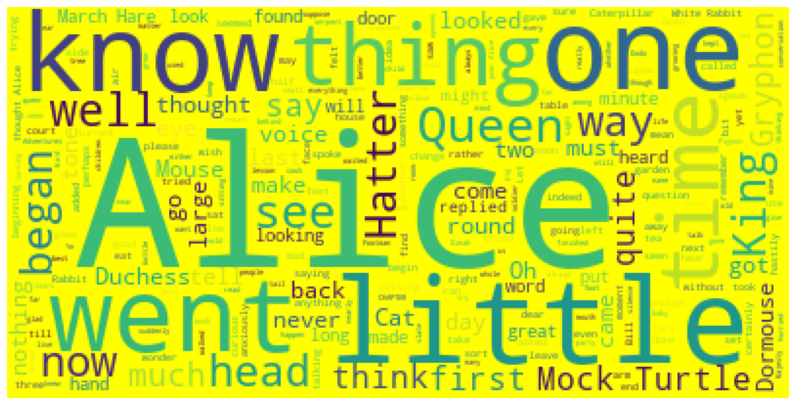

In [85]:
fig = plt.figure()
fig.set_figheight(28)
fig.set_figwidth(14)

plt.imshow(Alice_WC)
plt.axis('off')
plt.show();

Kesimpulan : dari 12500 kata pertama dalam novel, kata yang paling banyak adalah Alice, Little, One, Know, Went, thing

## wordcloud dengan menggunakan masking

In [91]:
Alice_Mask = np.array(Image.open('Data/alice_mask.png'))
Alice_Mask.shape

(900, 900)

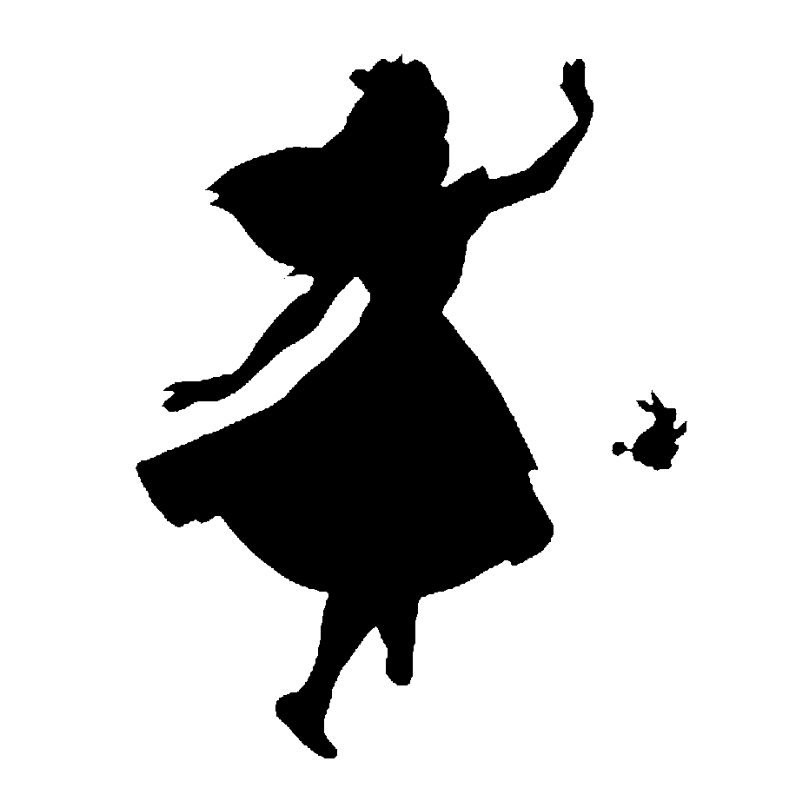

In [97]:
fig = plt.figure()
fig.set_figheight(28)
fig.set_figwidth(14)

plt.imshow(Alice_Mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show();

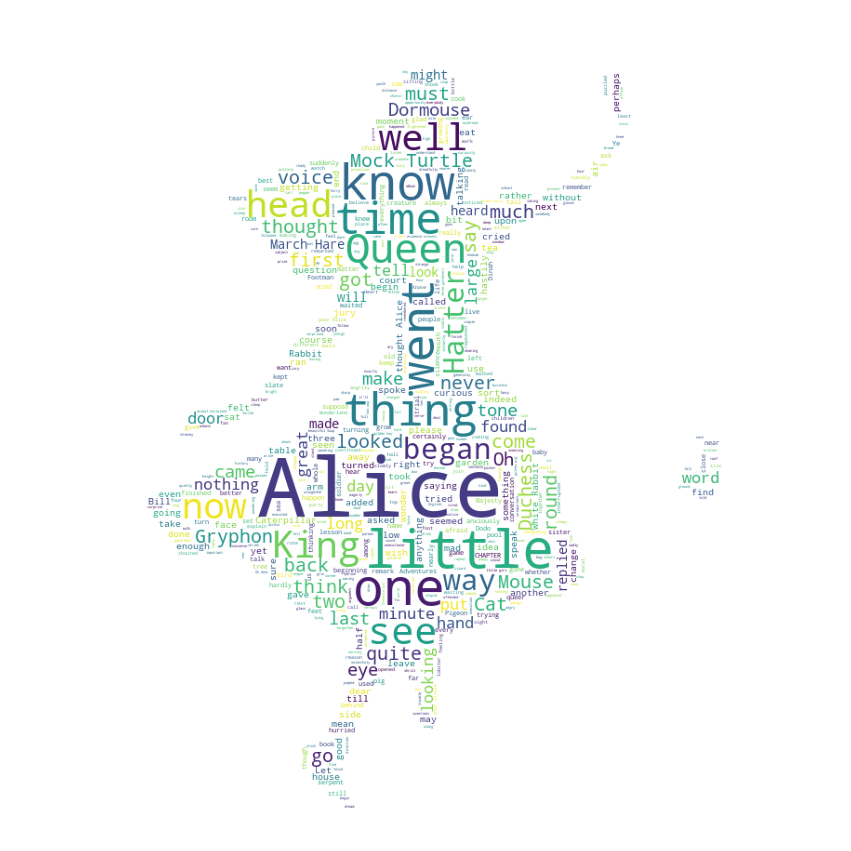

In [101]:
stopwords.add('Said')
Alice_WC = WordCloud(background_color='white',
                    max_words=12500, 
                    stopwords=STOPWORDS,
                    mask=Alice_Mask)

Alice_WC.generate(Alice_Novel)

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(15)

plt.imshow(Alice_WC)
plt.axis('off')
plt.show();

## Regression Plot using Seaborn

In [102]:
!pip install seaborn

In [136]:
import seaborn as sns

In [137]:
pd_canada[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [133]:
Tot_Immigrant = pd.DataFrame(pd_canada[years].sum())


In [134]:
Tot_Immigrant.index = map(float, Tot_Immigrant.index)
Tot_Immigrant.reset_index(inplace=True)

In [135]:
Tot_Immigrant.columns=['year', 'total']
Tot_Immigrant.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


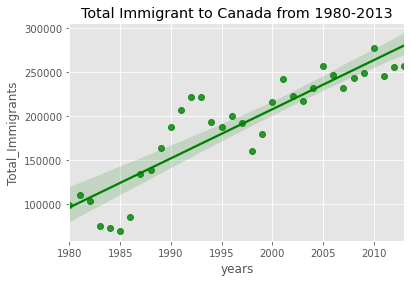

<Figure size 1440x1080 with 0 Axes>

In [150]:
ax = sns.regplot(x='year', y='total', data=Tot_Immigrant, marker="o", color='green')
ax.set(xlabel='years',ylabel='Total_Immigrants')
ax.set_title('Total Immigrant to Canada from 1980-2013')


plt.figure(figsize=(20,15))
plt.show();